In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
columns_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [26]:
df = pd.read_csv('u.data', sep='\t', names = columns_names)

In [27]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [28]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [29]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [30]:
df = pd.merge(movie_titles, df, on='item_id')

In [31]:
df.head()

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [32]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(20)

title
They Made Me a Criminal (1939)                            5.000000
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Saint of Fort Washington, The (1993)                      5.000000
Someone Else's America (1995)                             5.000000
Star Kid (1997)                                           5.000000
Great Day in Harlem, A (1994)                             5.000000
Aiqing wansui (1994)                                      5.000000
Santa with Muscles (1996)                                 5.000000
Prefontaine (1997)                                        5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Pather Panchali (1955)                                    4.625000
Some Mother's Son (1996)                                  4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Anna (1996)                                               4.500000
Everest (1998)                                          

In [33]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [34]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean())

In [35]:
rating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [36]:
rating['n_of_ratings'] = df.groupby('title')['rating'].count()

In [37]:
rating.head()

,rating,n_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [38]:
rating['n_of_ratings'].sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: n_of_ratings, dtype: int64

<Axes: >

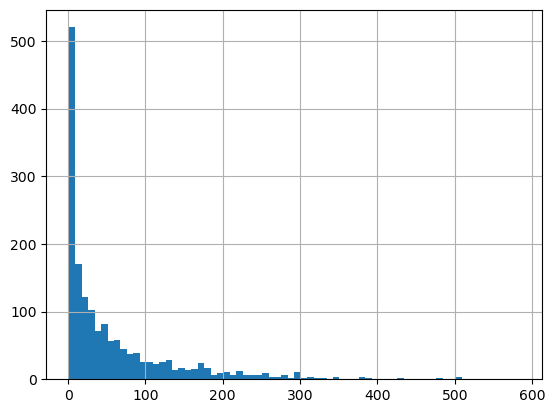

In [39]:
rating['n_of_ratings'].hist(bins=70)

<Axes: >

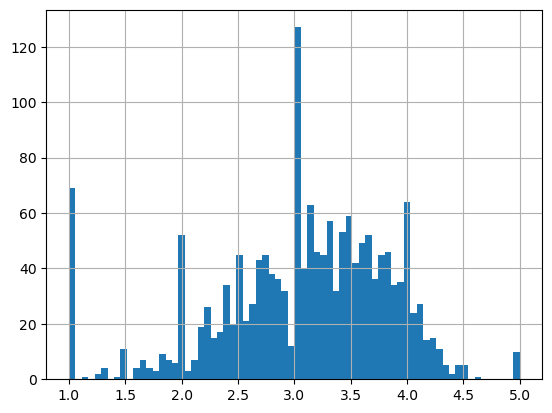

In [40]:
rating['rating'].hist(bins=70,)

C:\Users\joaom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joaom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


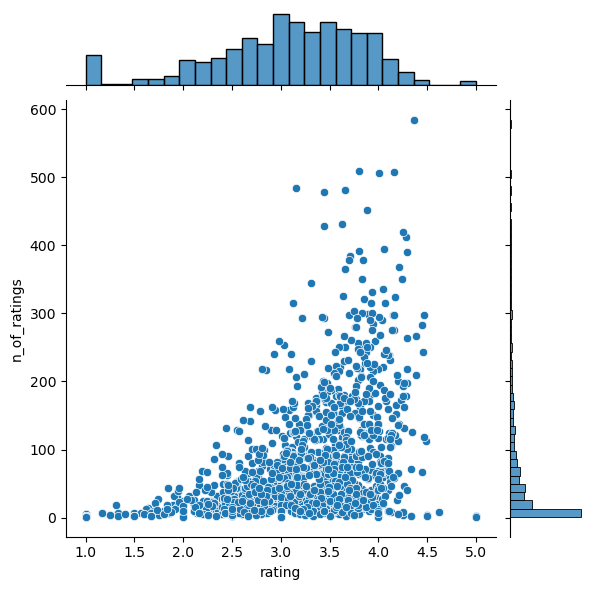

In [41]:
sns.jointplot(x='rating', y='n_of_ratings',data=rating)

In [42]:
df.head()

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [43]:
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')
                          

In [44]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
movie_ratings = moviemat[movie_title]

NameError: name 'movie_title' is not defined

In [46]:
def movie_recommendations(movie_title, min_ratings=100):
    if movie_title not in moviemat.columns:
        return f"O filme '{movie_title}' não está presente no DataFrame."

    movie_ratings = moviemat[movie_title]
    similar_to_movie = moviemat.corrwith(movie_ratings)
    corr_movie = pd.DataFrame(similar_to_movie, columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie = corr_movie.join(rating['n_of_ratings'])
    recommendations = corr_movie[(corr_movie['n_of_ratings']>min_ratings) & (corr_movie['Correlation']>0.7)]

    return recommendations
    

In [47]:
movie_title = '187 (1997)'

In [48]:
movie_recommendations(movie_title)

C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\joaom\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Correlation,n_of_ratings
title,,
"Adventures of Priscilla, Queen of the Desert, The (1994)",0.883883,111
"African Queen, The (1951)",0.912871,152
"American President, The (1995)",0.868599,164
Cape Fear (1991),0.820768,171
Carrie (1976),0.700877,121
Cinema Paradiso (1988),0.912871,121
Clear and Present Danger (1994),0.894427,179
"Close Shave, A (1995)",0.705534,112
Cold Comfort Farm (1995),0.867336,125
